In [ ]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df = pd.read_csv('bombay.csv')
df = df.drop(columns=df.columns[:4])
df.tail()

,Month,Day,Year,Temp
9261,5,9,2020,87.3
9262,5,10,2020,87.7
9263,5,11,2020,88.1
9264,5,12,2020,87.3
9265,5,13,2020,85.0


In [ ]:
df.isnull().sum()

Month    0
Day      0
Year     0
Temp     0
dtype: int64

In [ ]:
dates = df['Year'].values
temp  = df['Temp'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler(feature_range=(0,1))
scaled = minmaxscaler.fit_transform(df[['Temp']])
df[['Temp']] = scaled

In [ ]:
dates = np.array(df['Temp'].values, dtype = np.float64)
temp = df['Temp'].values

In [ ]:
from sklearn.model_selection import train_test_split
dates_train, dates_test, temp_train, temp_test = train_test_split(dates, temp, test_size=0.2, random_state=0, shuffle=False)
print(len(dates_train), len(dates_test))

7412 1854


In [ ]:
skala_data = (temp.max() - temp.min()) * 10/100
print(skala_data)

0.1


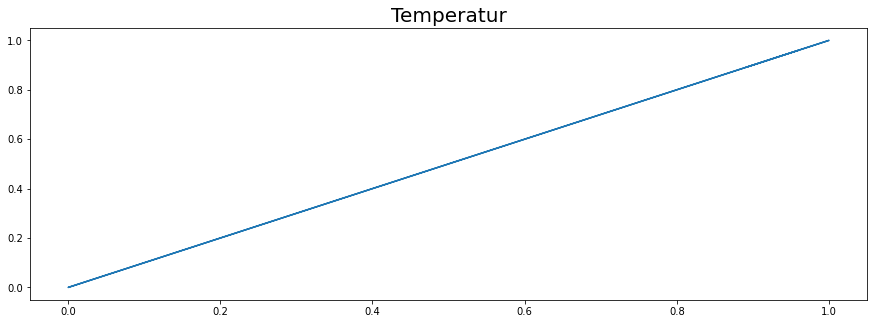

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(dates, temp)
plt.title('Temperatur',
          fontsize=20);

In [ ]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
threshold_mae = (temp.max() - temp.min()) * 10/100
good_mae = threshold_mae
good_mae

0.1

In [ ]:
train_set = windowed_dataset(temp_train, window_size=60, batch_size=100, shuffle_buffer=1000)
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set,epochs=100)

Epoch 1/100
74/74 [==============================] - 13s 120ms/step - loss: 0.0012 - mae: 0.0171
Epoch 2/100
74/74 [==============================] - 9s 119ms/step - loss: 0.0012 - mae: 0.0171
Epoch 3/100
74/74 [==============================] - 9s 120ms/step - loss: 0.0012 - mae: 0.0172
Epoch 4/100
74/74 [==============================] - 9s 118ms/step - loss: 0.0012 - mae: 0.0172
Epoch 5/100
74/74 [==============================] - 9s 119ms/step - loss: 0.0012 - mae: 0.0171
Epoch 6/100
74/74 [==============================] - 9s 121ms/step - loss: 0.0012 - mae: 0.0171
Epoch 7/100
74/74 [==============================] - 9s 119ms/step - loss: 0.0012 - mae: 0.0173
Epoch 8/100
74/74 [==============================] - 9s 121ms/step - loss: 0.0012 - mae: 0.0171
Epoch 9/100
74/74 [==============================] - 9s 120ms/step - loss: 0.0012 - mae: 0.0171
Epoch 10/100
74/74 [==============================] - 9s 120ms/step - loss: 0.0012 - mae: 0.0172
Epoch 11/100
74/74 [==================

KeyboardInterrupt: ignored